In [1]:
import csv
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [3]:
from tqdm.notebook import tqdm
# Read data from text
with open("D:/Plagiarism_detection/train_snli.txt") as file:
    data = file.readlines()
    
# prepare csv file
with open('data.csv', 'w', newline= '') as csvfile:
    filenames = ['source_txt', 'plagiarism_txt', 'label']
    writer = csv.DictWriter(csvfile, fieldnames=filenames)
    
    writer.writeheader()
    for line in tqdm(data):
        parts = line.strip().split('\t')
        source_txt = parts[0]
        plagiarishm_txt = parts[1]
        label = int(parts[2])
        
        writer.writerow({
            'source_txt' : source_txt,
            'plagiarism_txt' : plagiarishm_txt,
            'label' : label
        })
print('CSV file created successfully...')

  0%|          | 0/367373 [00:00<?, ?it/s]

CSV file created successfully...


In [2]:
df=pd.read_csv(r'D:/Plagiarism_detection/data.csv')

In [3]:
df

,source_txt,plagiarism_txt,label
0,A person on a horse jumps over a broken down a...,"A person is at a diner, ordering an omelette.",0
1,A person on a horse jumps over a broken down a...,"A person is outdoors, on a horse.",1
2,Children smiling and waving at camera,There are children present,1
3,Children smiling and waving at camera,The kids are frowning,0
4,A boy is jumping on skateboard in the middle o...,The boy skates down the sidewalk.,0
...,...,...,...
367368,A dog with a blue collar plays ball outside.,a dog is outside,1
367369,Four dirty and barefooted children.,four children have dirty feet.,1
367370,Four dirty and barefooted children.,four kids won awards for 'cleanest feet',0
367371,A man is surfing in a bodysuit in beautiful bl...,A man in a business suit is heading to a board...,0


In [4]:
df['label'].value_counts()

label
0    183966
1    183407
Name: count, dtype: int64

In [5]:
df.isnull().sum()

source_txt        0
plagiarism_txt    4
label             0
dtype: int64

In [6]:
df=df.iloc[0:100000,:]

In [7]:
df.isnull().sum()

source_txt        0
plagiarism_txt    2
label             0
dtype: int64

In [8]:
df.dropna(inplace=True,ignore_index=True)

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [10]:
def preprocess(q):
    q = str(q).lower().strip()
    
    # Replacing some numbers with string equivalents (not perfect, can be done better to account for more cases)
    q = q.replace(',000,000,000 ', 'b ')
    q = q.replace(',000,000 ', 'm ')
    q = q.replace(',000 ', 'k ')
    q = re.sub(r'([0-9]+)000000000', r'\1b', q)
    q = re.sub(r'([0-9]+)000000', r'\1m', q)
    q = re.sub(r'([0-9]+)000', r'\1k', q)
    
    # Decontracting words
    # https://en.wikipedia.org/wiki/Wikipedia%3aList_of_English_contractions
    # https://stackoverflow.com/a/19794953
    contractions = { 
    "ain't": "am not",
    "aren't": "are not",
    "can't": "can not",
    "can't've": "can not have",
    "'cause": "because",
    "could've": "could have",
    "couldn't": "could not",
    "couldn't've": "could not have",
    "didn't": "did not",
    "doesn't": "does not",
    "don't": "do not",
    "hadn't": "had not",
    "hadn't've": "had not have",
    "hasn't": "has not",
    "haven't": "have not",
    "he'd": "he would",
    "he'd've": "he would have",
    "he'll": "he will",
    "he'll've": "he will have",
    "he's": "he is",
    "how'd": "how did",
    "how'd'y": "how do you",
    "how'll": "how will",
    "how's": "how is",
    "i'd": "i would",
    "i'd've": "i would have",
    "i'll": "i will",
    "i'll've": "i will have",
    "i'm": "i am",
    "i've": "i have",
    "isn't": "is not",
    "it'd": "it would",
    "it'd've": "it would have",
    "it'll": "it will",
    "it'll've": "it will have",
    "it's": "it is",
    "let's": "let us",
    "ma'am": "madam",
    "mayn't": "may not",
    "might've": "might have",
    "mightn't": "might not",
    "mightn't've": "might not have",
    "must've": "must have",
    "mustn't": "must not",
    "mustn't've": "must not have",
    "needn't": "need not",
    "needn't've": "need not have",
    "o'clock": "of the clock",
    "oughtn't": "ought not",
    "oughtn't've": "ought not have",
    "shan't": "shall not",
    "sha'n't": "shall not",
    "shan't've": "shall not have",
    "she'd": "she would",
    "she'd've": "she would have",
    "she'll": "she will",
    "she'll've": "she will have",
    "she's": "she is",
    "should've": "should have",
    "shouldn't": "should not",
    "shouldn't've": "should not have",
    "so've": "so have",
    "so's": "so as",
    "that'd": "that would",
    "that'd've": "that would have",
    "that's": "that is",
    "there'd": "there would",
    "there'd've": "there would have",
    "there's": "there is",
    "they'd": "they would",
    "they'd've": "they would have",
    "they'll": "they will",
    "they'll've": "they will have",
    "they're": "they are",
    "they've": "they have",
    "to've": "to have",
    "wasn't": "was not",
    "we'd": "we would",
    "we'd've": "we would have",
    "we'll": "we will",
    "we'll've": "we will have",
    "we're": "we are",
    "we've": "we have",
    "weren't": "were not",
    "what'll": "what will",
    "what'll've": "what will have",
    "what're": "what are",
    "what's": "what is",
    "what've": "what have",
    "when's": "when is",
    "when've": "when have",
    "where'd": "where did",
    "where's": "where is",
    "where've": "where have",
    "who'll": "who will",
    "who'll've": "who will have",
    "who's": "who is",
    "who've": "who have",
    "why's": "why is",
    "why've": "why have",
    "will've": "will have",
    "won't": "will not",
    "won't've": "will not have",
    "would've": "would have",
    "wouldn't": "would not",
    "wouldn't've": "would not have",
    "y'all": "you all",
    "y'all'd": "you all would",
    "y'all'd've": "you all would have",
    "y'all're": "you all are",
    "y'all've": "you all have",
    "you'd": "you would",
    "you'd've": "you would have",
    "you'll": "you will",
    "you'll've": "you will have",
    "you're": "you are",
    "you've": "you have"
    }
    
    q_decontracted=[]
    
    for word in q.split():
        if word in contractions:
            word=contractions[word]
        q_decontracted.append(word)
        
    q=' '.join(q_decontracted)
    q=q.replace("'ve"," have")
    q=q.replace("n't"," not")
    q = q.replace("'re", " are")
    q = q.replace("'ll", " will")

    
    #remove punctuations
    pattern=re.compile('\W')
    q=re.sub(pattern, ' ',q).strip()
    
    return q;

In [11]:
preprocess("I'll do it")

'i will do it'

In [12]:
df['source_txt']=df['source_txt'].apply(preprocess)
df['plagiarism_txt']=df['plagiarism_txt'].apply(preprocess)

In [13]:
#total number of word
df['src_txt_len']=df['source_txt'].apply(lambda row:len(row.split(" ")))
df['plag_txt_len']=df['plagiarism_txt'].apply(lambda row:len(row.split(" ")))

In [14]:
#total number of character
df['src_text_char']=df['source_txt'].str.len()
df['plag_txt_char']=df['plagiarism_txt'].str.len()

In [15]:
def common_word(row):
    w1=set(map(lambda word:word.lower().strip(),row['source_txt'].split(" ")))
    w2=set(map(lambda word:word.lower().strip(),row['plagiarism_txt'].split(" ")))
    return len(w1 & w2)

In [16]:
df['common_word']=df.apply(common_word,axis=1)

In [17]:
df.head()

,source_txt,plagiarism_txt,label,src_txt_len,plag_txt_len,src_text_char,plag_txt_char,common_word
0,a person on a horse jumps over a broken down a...,a person is at a diner ordering an omelette,0,11,10,53,44,2
1,a person on a horse jumps over a broken down a...,a person is outdoors on a horse,1,11,8,53,32,4
2,children smiling and waving at camera,there are children present,1,6,4,37,26,1
3,children smiling and waving at camera,the kids are frowning,0,6,4,37,21,0
4,a boy is jumping on skateboard in the middle o...,the boy skates down the sidewalk,0,13,6,60,32,2


In [18]:
def total_word(row):
    w1=set(map(lambda word:word.lower().strip(),row['source_txt'].split(" ")))
    w2=set(map(lambda word:word.lower().strip(),row['plagiarism_txt'].split(" ")))
    return (len(w1)+len(w2))

In [19]:
df['total_word']=df.apply(total_word,axis=1)

In [20]:
df['word_share']=round(df['common_word']/df['total_word'],2)

In [21]:
df.head(2)

,source_txt,plagiarism_txt,label,src_txt_len,plag_txt_len,src_text_char,plag_txt_char,common_word,total_word,word_share
0,a person on a horse jumps over a broken down a...,a person is at a diner ordering an omelette,0,11,10,53,44,2,18,0.11
1,a person on a horse jumps over a broken down a...,a person is outdoors on a horse,1,11,8,53,32,4,16,0.25


In [22]:
import nltk
from nltk.corpus import stopwords
#Advanced features
nltk.download('stopwords')
def fetch_token_features(row):
    s1=row['source_txt']
    s2=row['plagiarism_txt']
    
    stop_words=stopwords.words("english")
    
    token_features=[0.0]*8
    
    #converting sentence into token
    s1_tokens=s1.split()
    s2_tokens=s2.split()
    
    if len(s1_tokens)==0 or len(s2_tokens)==0:
        return token_features
    
    #get non stopwords of questions
    s1_words=set([word for word in s1_tokens if word not in stop_words])
    s2_words=set([word for word in s2_tokens if word not in stop_words])
    
    #get stopwords of questions
    s1_stops=set([word for word in s1_tokens if word in stop_words])
    s2_stops=set([word for word in s2_tokens if word in stop_words])
    
    #get common non stopwords
    common_word_count=len(s1_words & s2_words)
    
    #get common stopwords
    common_stop_count=len(s1_stops & s2_stops)
    
    #common token count
    common_token_count=len(set(s1_tokens) & set(s2_tokens))
    
    SAFE_DIV = 0.0001 
    token_features[0] = common_word_count / (min(len(s1_words), len(s2_words)) + SAFE_DIV) #common_nonstopwords/min_non_stopwords
    token_features[1] = common_word_count / (max(len(s1_words), len(s2_words)) + SAFE_DIV) #common_nonstopwords/max_non_stopwords
    token_features[2] = common_stop_count / (min(len(s1_stops), len(s2_stops)) + SAFE_DIV) #common_stopwords/min_stopwords
    token_features[3] = common_stop_count / (max(len(s1_stops), len(s2_stops)) + SAFE_DIV) #common_stopwords/max_stopwords
    token_features[4] = common_token_count / (min(len(s1_tokens), len(s2_tokens)) + SAFE_DIV) #common_token/min_token
    token_features[5] = common_token_count / (max(len(s1_tokens), len(s2_tokens)) + SAFE_DIV) #common_token/max_token
    
    # Last word of both question is same or not
    token_features[6] = int(s1_tokens[-1] == s2_tokens[-1])
    
    # First word of both question is same or not
    token_features[7] = int(s1_tokens[0] == s2_tokens[0])
    
    return token_features


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ritti\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [23]:
token_features = df.apply(fetch_token_features, axis=1)

df["cwc_min"]       = list(map(lambda x: x[0], token_features))
df["cwc_max"]       = list(map(lambda x: x[1], token_features))
df["csc_min"]       = list(map(lambda x: x[2], token_features))
df["csc_max"]       = list(map(lambda x: x[3], token_features))
df["ctc_min"]       = list(map(lambda x: x[4], token_features))
df["ctc_max"]       = list(map(lambda x: x[5], token_features))
df["last_word_eq"]  = list(map(lambda x: x[6], token_features))
df["first_word_eq"] = list(map(lambda x: x[7], token_features))

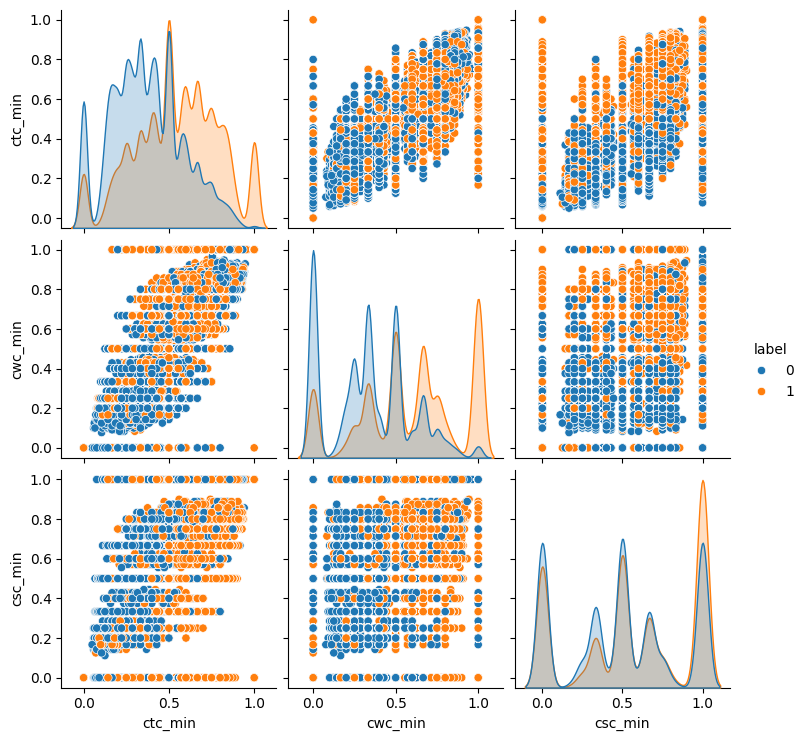

In [25]:
sns.pairplot(df[['ctc_min', 'cwc_min', 'csc_min','label']],hue='label')

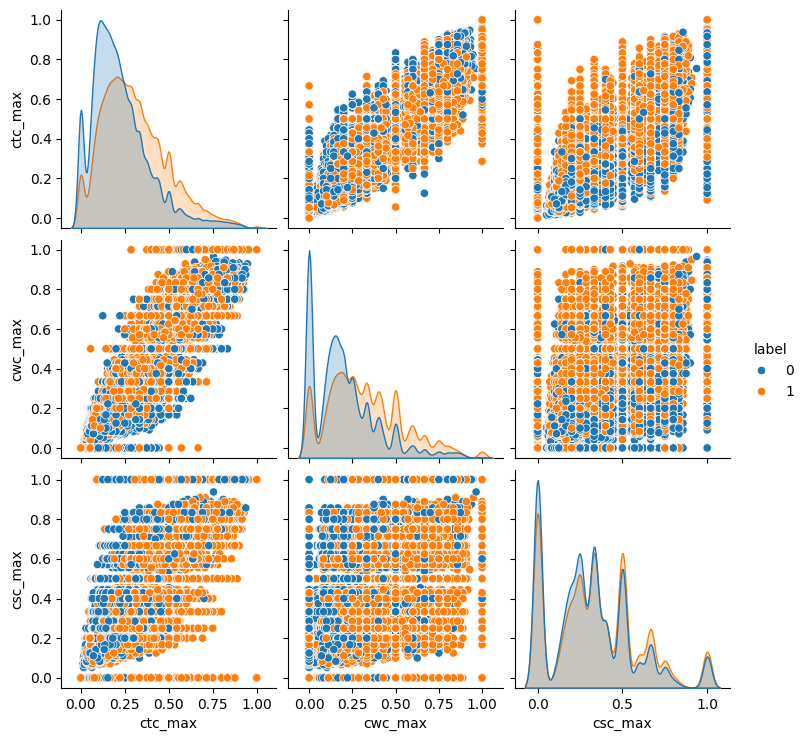

In [26]:
sns.pairplot(df[['ctc_max', 'cwc_max', 'csc_max','label']],hue='label')

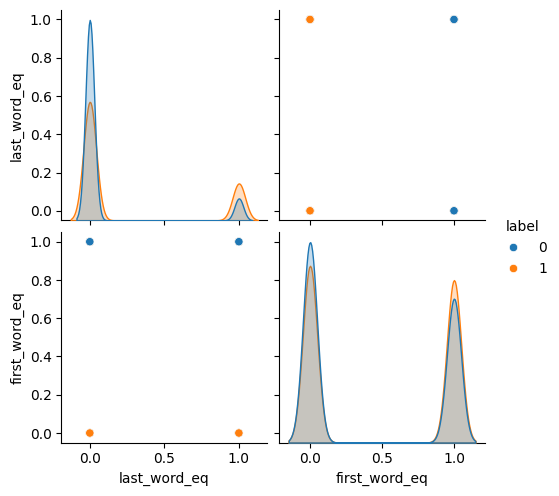

In [27]:
sns.pairplot(df[['last_word_eq', 'first_word_eq', 'label']],hue='label')

In [24]:
df.head(3)

,source_txt,plagiarism_txt,label,src_txt_len,plag_txt_len,src_text_char,plag_txt_char,common_word,total_word,word_share,cwc_min,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq
0,a person on a horse jumps over a broken down a...,a person is at a diner ordering an omelette,0,11,10,53,44,2,18,0.11,0.249994,0.199996,0.249994,0.249994,0.222220,0.181817,0,1
1,a person on a horse jumps over a broken down a...,a person is outdoors on a horse,1,11,8,53,32,4,16,0.25,0.666644,0.399992,0.666644,0.499988,0.571420,0.363633,0,1
2,children smiling and waving at camera,there are children present,1,6,4,37,26,1,10,0.10,0.499975,0.249994,0.000000,0.000000,0.249994,0.166664,0,0


In [25]:
import distance

def fetch_length_features(row):
    
    s1 = row['source_txt']
    s2 = row['plagiarism_txt']
    
    length_features = [0.0]*3
    
    # Converting the Sentence into Tokens: 
    s1_tokens = s1.split()
    s2_tokens = s2.split()
    
    if len(s1_tokens) == 0 or len(s2_tokens) == 0:
        return length_features
    
    # Absolute length features
    length_features[0] = abs(len(s1_tokens) - len(s2_tokens))
    
    #Average Token Length of both sentences
    length_features[1] = (len(s1_tokens) + len(s2_tokens))/2

    #lcsubstrings returns multiple longest substring if there are ties, therefor we need to store it in list
    strs = list(distance.lcsubstrings(s1, s2))
    length_features[2] = len(strs[0]) / (min(len(s1), len(s2)) + 1)
    
    return length_features

In [26]:
length_features = df.apply(fetch_length_features, axis=1)

df['abs_len_diff'] = list(map(lambda x: x[0], length_features))
df['mean_len'] = list(map(lambda x: x[1], length_features))
df['longest_substr_ratio'] = list(map(lambda x: x[2], length_features))

In [27]:
df.head()

,source_txt,plagiarism_txt,label,src_txt_len,plag_txt_len,src_text_char,plag_txt_char,common_word,total_word,word_share,...,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,longest_substr_ratio
0,a person on a horse jumps over a broken down a...,a person is at a diner ordering an omelette,0,11,10,53,44,2,18,0.11,...,0.199996,0.249994,0.249994,0.222220,0.181817,0,1,2,10.0,0.200000
1,a person on a horse jumps over a broken down a...,a person is outdoors on a horse,1,11,8,53,32,4,16,0.25,...,0.399992,0.666644,0.499988,0.571420,0.363633,0,1,4,9.0,0.333333
2,children smiling and waving at camera,there are children present,1,6,4,37,26,1,10,0.10,...,0.249994,0.000000,0.000000,0.249994,0.166664,0,0,2,5.0,0.333333
3,children smiling and waving at camera,the kids are frowning,0,6,4,37,21,0,10,0.00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,2,5.0,0.136364
4,a boy is jumping on skateboard in the middle o...,the boy skates down the sidewalk,0,13,6,60,32,2,17,0.12,...,0.166664,0.499975,0.166664,0.333328,0.153845,0,0,7,9.5,0.181818


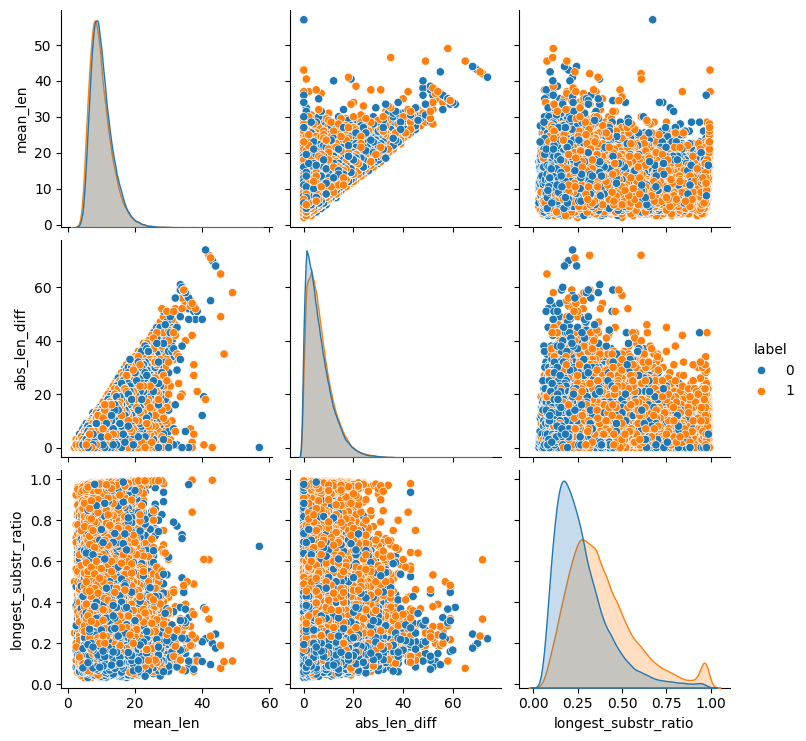

In [32]:
sns.pairplot(df[['mean_len', 'abs_len_diff','longest_substr_ratio', 'label']],hue='label')

In [28]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer=CountVectorizer(max_features=3000)

In [29]:
# df1=df[['source_txt']].iloc[0:100000]
# df2=df[['plagiarism_txt']].iloc[0:100000]
# df3=df[['source_txt']].iloc[100000:200001]
# df4=df[['plagiarism_txt']].iloc[100000:200001]

# sentences1=list(df1['source_txt'])+list(df2['plagiarism_txt'])
# src_arr,plag_arr=np.vsplit(vectorizer.fit_transform(sentences1).toarray().astype(np.float32),2)
# sentences2=list(df3['source_txt'])+list(df4['plagiarism_txt'])
# src_arr2,plag_arr2=np.vsplit(vectorizer.fit_transform(sentences2).toarray().astype(np.float32),2)
# temp_df1=pd.DataFrame(src_arr,index=df.iloc[0:100000].index)
# temp_df2=pd.DataFrame(plag_arr,index=df.iloc[0:100000].index)

# temp_df3=pd.DataFrame(src_arr2,index=df.iloc[100000:200001].index)
# temp_df4=pd.DataFrame(plag_arr2,index=df.iloc[100000:200001].index)

# final_df1=pd.concat([temp_df1,temp_df2],axis=1)
# final_df2=pd.concat([temp_df3,temp_df4],axis=1)

# final=pd.concat([final_df1,final_df2],axis=0)

In [30]:
sentences=list(df['source_txt'])+list(df['plagiarism_txt'])
src_arr,plag_arr=np.vsplit(vectorizer.fit_transform(sentences).toarray().astype(np.float32),2)

temp_df1=pd.DataFrame(src_arr,index=df.index)
temp_df2=pd.DataFrame(plag_arr,index=df.index)
temp_df=pd.concat([temp_df1,temp_df2],axis=1)
temp_df

,0,1,2,3,4,5,6,7,8,9,...,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99993,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99994,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [31]:
# temp_df.to_csv("temp_df.csv",index=False)

In [32]:
# df_new=pd.read_csv(r'D:\Plagiarism_detection\temp_df.csv')
df_new=temp_df

In [33]:
df_new

,0,1,2,3,4,5,6,7,8,9,...,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99993,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99994,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [34]:
df_f=df.drop(columns=['source_txt','plagiarism_txt'])

In [35]:
final_df=pd.concat([df_f,df_new],axis=1)
final_df.head()

,label,src_txt_len,plag_txt_len,src_text_char,plag_txt_char,common_word,total_word,word_share,cwc_min,cwc_max,...,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
0,0,11,10,53,44,2,18,0.11,0.249994,0.199996,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,11,8,53,32,4,16,0.25,0.666644,0.399992,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,6,4,37,26,1,10,0.10,0.499975,0.249994,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,6,4,37,21,0,10,0.00,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,13,6,60,32,2,17,0.12,0.333322,0.166664,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [36]:
final_df.shape

(99998, 6019)

In [42]:
# final_df.to_csv("final_df.csv",index=False)

In [37]:
# final_df=pd.read_csv(r'D:\Plagiarism_detection\final_df.csv')

In [38]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(final_df.iloc[:,1:].values,final_df['label'].values,test_size=0.2,random_state=1)

In [39]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf=RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred=rf.predict(X_test)
accuracy_score(y_pred,y_test)

0.77215

In [40]:
import pickle
model_pkl_file = "classifier_model.pkl"

with open(model_pkl_file, 'wb') as file:  
    pickle.dump(rf, file)

In [41]:

from sklearn.metrics import confusion_matrix
#randomforest
confusion_matrix(y_test,y_pred)
#predict->
#    0  ,   1
#0  [FN      FP]
#1  [TN      TP]
#here to decrease FP is more important

array([[7975, 2097],
       [2460, 7468]], dtype=int64)